---
# Guia Redes Neuronales Convolutivas

En esta guía profundizaremos y exploraremos algunos elementos de las redes neuronales convolutivas:
- Tratamiento de imágenes
- Filtros Convolutivos
- Pooling


In [1]:
# imports comunes
import numpy as np
import matplotlib.pyplot as plt

### 1. Tratamiento de imágenes

En Python, existen varias librerías que nos prestan apoyo al momento de tratar una imágen. Para facilitar el manejo de imágenes, utilizaremos la librería **skimage**, que permite el procesamiento de imágenes en Python y computer vision. Posiblemente deberás instalarla en tu entorno de trabajo. A continuación un link al sitio web oficial:

https://scikit-image.org/

In [3]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import rescale

In [6]:
# Cargar una imagen (por ejemplo, una foto de mi gato...)
mi_gato = imread('leon.jpg')


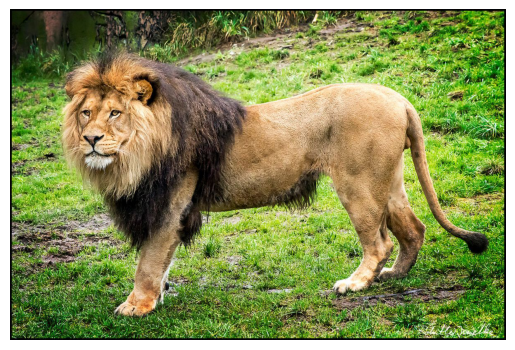

In [8]:
# Mostrar la foto de mi gato
plt.imshow(mi_gato)
plt.axis("off")  # Opcional: ocultar ejes
plt.show()


In [54]:
# dimensiones de la imagen
# es un tensor que contien, ancho, alto, y canal
# el valor 3 indica que trae 3 canales para los colores (RGB)
mi_gato.shape


(800, 1200, 3)

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_15900/3793814909.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


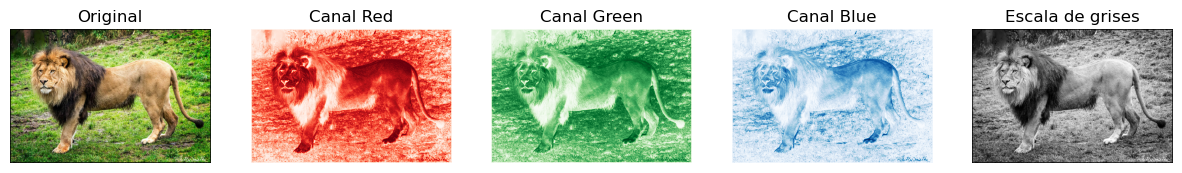

In [56]:
# ahora, separaremos los canales de la imagen y los visualizaremos
red_channel = mi_gato[:, :, 0]  # Canal rojo
green_channel = mi_gato[:, :, 1]  # Canal verde
blue_channel = mi_gato[:, :, 2]  # Canal azul
gray_image = rgb2gray(mi_gato)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 20))

ax1.imshow(mi_gato)
ax1.set_title('Original')
ax1.set_axis_off()

ax2.imshow(red_channel, cmap='Reds')
ax2.set_title('Canal Red')
ax2.set_axis_off()

ax3.imshow(green_channel, cmap='Greens')
ax3.set_title('Canal Green')
ax3.set_axis_off()

ax4.imshow(blue_channel, cmap='Blues')
ax4.set_title('Canal Blue')
ax4.set_axis_off()

ax5.imshow(gray_image, cmap='gray')
ax5.set_title('Escala de grises')
ax5.set_axis_off()

fig.show()

Ahora, realizaremos un escalado de la imagen

In [59]:
# resize de la imagen, lo escalamos al 5% de su dimension, lo hacemos para hacer más agil el procesamiento
mi_gato_rescalado = rescale(mi_gato, scale=0.05)


In [61]:
# dimensiones de la imagen rescalada
# note que la imagen rescalada tiene un solo canal de color, que corresponde a la escala de gris
mi_gato_rescalado.shape

(40, 60, 1)

In [63]:
# Lo dejamos en un arreglo 2D
mi_gato_rescalado = mi_gato_rescalado[:,:,0]
mi_gato_rescalado.shape

(40, 60)

### 2. Filtros Convolutivos

Los filtros convolutivos son una herramienta poderosa en el procesamiento de imágenes. A continuación, exploraremos algunos ejemplos en python para el procesamiento de imagenes utilizando filtros convolutivos.




**¿Qué es la convolución?**

La convolución es una operación matemática que combina dos funciones para crear una tercera. En el contexto del procesamiento de imágenes, se utiliza para aplicar efectos a una imagen mediante un **kernel** o **núcleo**.

**Kernel o Núcleo**

Un kernel es una matriz que se desliza sobre la imagen original. Cada píxel de la imagen se multiplica por los valores correspondientes del kernel y se suma para obtener el valor del píxel en la imagen resultante.

**Implementación en Python**

Para realizar una operación de convolución, podríamos programar nuestra propia implementación, pero también podemos utilizar la función convolve2d de la librería numpy, lo cual hace mucho más fácil la labor. A continuación, un ejemplo de una operación de convolución.

In [67]:
# importamos módulo signal y función convolve2d
from scipy.signal import convolve2d

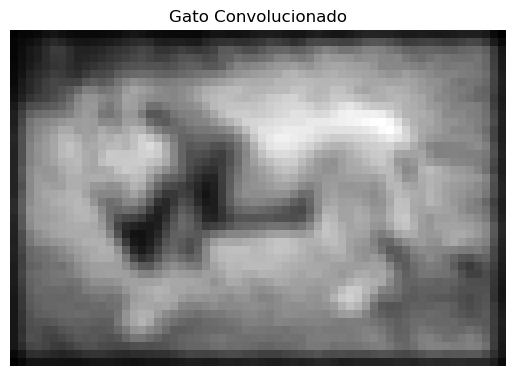

In [71]:
# definimos una matriz de kernel, puedes variar estos valores y ver el efecto
kernel = np.array([[1,1,0],
                   [1,0,1], 
                   [0,1,1]])

# aplicamos la operación de convolución
gato_convolucionado = convolve2d(mi_gato_rescalado, kernel)

# visualizamos el resultado
plt.imshow(gato_convolucionado, cmap='gray')
plt.title('Gato Convolucionado')
plt.axis('off')
plt.show()

In [73]:
# mejor definimos una funcipara facilitar el despliegue de las imagenes
def desplegar_imagenes(imagen, imagen_convolucionada):

    # Mostrar la imagen original y la imagen filtrada
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title('Imagen original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(imagen_convolucionada, cmap='gray')
    plt.title('Imagen filtrada')
    plt.axis('off')

    plt.show()


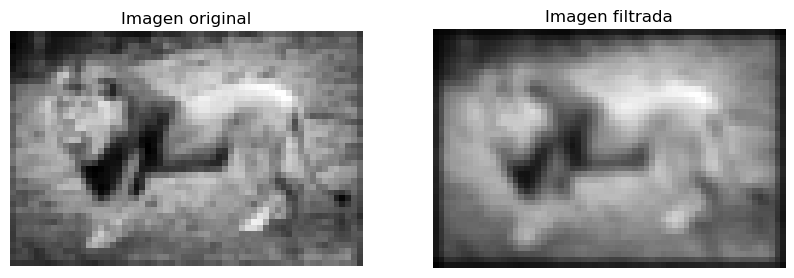

In [75]:
# ¿Notas la diferencia?
desplegar_imagenes(mi_gato_rescalado, gato_convolucionado)

Ahora te pediremos que utilices varios filtros, puedes utilizar los que aparecen en esta web:

https://setosa.io/ev/image-kernels/

Puedes probar filtros tales como identity, blur, emboss, outline, sharpen, sobel, etc.. Incluso puedes probar tus propios valores.


In [ ]:
# Filtro Identity
import random

kernel_identity = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

identity_img = convolve2d(mi_gato_rescalado, kernel_identity, mode="same", boundary="fill", fillvalue=0)

desplegar_imagenes(mi_gato_rescalado, identity_img)

In [ ]:
# Filtro Blur (suavizado)

kernel_blur = np.ones((3, 3)) / 9.0

blur_img = convolve2d(mi_gato_rescalado, kernel_blur, mode="same", boundary="symm")

desplegar_imagenes(mi_gato_rescalado, blur_img)

In [ ]:
# Filtro Emboss (relieve)

kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

emboss_img = convolve2d(mi_gato_rescalado, kernel_emboss, mode="same", boundary="symm")

desplegar_imagenes(mi_gato_rescalado, emboss_img)

In [ ]:
# Filtro Outline (detección de contornos)

kernel_outline = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])

outline_img = convolve2d(mi_gato_rescalado, kernel_outline, mode="same", boundary="symm")

desplegar_imagenes(mi_gato_rescalado, outline_img)

In [ ]:
# Filtro Sharpen (enfoque)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

sharpen_img = convolve2d(mi_gato_rescalado, kernel_sharpen, mode="same", boundary="symm")

desplegar_imagenes(mi_gato_rescalado, sharpen_img)

In [ ]:
# Filtro Sobel (bordes horizontales)

kernel_sobel_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

sobel_img = convolve2d(mi_gato_rescalado, kernel_sobel_x, mode="same", boundary="symm")

desplegar_imagenes(mi_gato_rescalado, sobel_img)

In [ ]:
# Tu filtro customizado. Busca un kernel personalizado que haga una convolución que sea interesante

# Filtro que resalta bordes diagonales
kernel_custom = np.array([[ 2,  0, -2],
                          [ 0,  0,  0],
                          [-2,  0,  2]])

custom_img = convolve2d(mi_gato_rescalado, kernel_custom, mode="same", boundary="symm")

desplegar_imagenes(mi_gato_rescalado, custom_img)

**Aplicar un filtro múltiples veces**

Es común, que en una imagen realicemos la aplicación de un filtro varias veces para procesar sus características. Para este efecto, vamos a crear una función que permita este propósito.

In [210]:
# Esta función realiza una convolución a la imagen múltiples veces (iterations)
def multi_convolver(image, kernel, iterations=1):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill', fillvalue = 0)
    return image

In [ ]:
# modifica los ejemplos anteriores para desplegar la imagen original, la imagen con 1 convolución, y una imagen con varias convoluciones (puede ser 5 por ejemplo). Prueba con varios kernels.

# Ejemplo usando el filtro sharpen
kernel_demo = kernel_sharpen

img_1_conv = multi_convolver(mi_gato_rescalado, kernel_demo, iterations=1)
img_5_conv = multi_convolver(mi_gato_rescalado, kernel_demo, iterations=5)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(mi_gato_rescalado, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_1_conv, cmap="gray")
plt.title("1 convolución")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_5_conv, cmap="gray")
plt.title("5 convoluciones")
plt.axis("off")

plt.show()

¿Qué filtros me permite reconocer los bordes y principales trazados de una imagen? ¿Qué filtros proporcionan una idea de volumen?

In [ ]:
# responda acá

respuesta = (
    "Los filtros de detección de bordes como Sobel y Outline "
    "son los que mejor permiten reconocer los contornos y trazados "
    "principales de la imagen, ya que responden fuertemente a cambios "
    "bruscos de intensidad.\n"
    "Los filtros de tipo Emboss y, en menor medida, Sharpen, dan una "
    "sensación de volumen porque resaltan luces y sombras, generando "
    "un efecto de relieve sobre los objetos de la imagen."
)

print(respuesta)

### 3. Operación de Pooling

Una operación de pooling, también conocida como submuestreo, es una operación comúnmente utilizada en el procesamiento de imágenes y en el aprendizaje profundo (deep learning) para reducir la dimensionalidad de una representación de datos.

En el contexto del aprendizaje profundo, el pooling se utiliza típicamente después de aplicar una capa convolucional. La idea principal detrás del pooling es reducir el tamaño espacial (ancho y alto) de la representación de la capa convolucional, manteniendo solo la información más importante.

El pooling ayuda en la reducción del overfitting, reduce la cantidad de parámetros y computaciones en la red neuronal, y proporciona invariantes a pequeñas transformaciones en la entrada de la red neuronal convolucional.

Por ejemplo, en una imagen de 100x100 píxeles con una capa de pooling de tamaño 2x2 y un paso (stride) de 2, la salida sería de 50x50 píxeles si estuviéramos utilizando max pooling. Esto significa que la imagen se reduciría a la mitad de su tamaño en cada dimensión.

In [79]:
from skimage import  measure

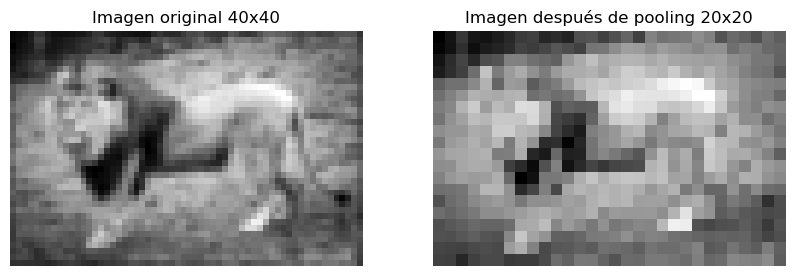

In [81]:
# Definir el tamaño de la ventana de pooling
window_shape = (2, 2)

# Aplicar max pooling a la imagen
pooled_image = measure.block_reduce(mi_gato_rescalado, window_shape, np.max)

# Mostrar la imagen original y la imagen después de aplicar pooling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mi_gato_rescalado, cmap='gray')
axes[0].set_title(f"Imagen original {mi_gato_rescalado.shape[0]}x{mi_gato_rescalado.shape[0]}")
axes[0].axis("off")
axes[1].imshow(pooled_image, cmap='gray')
axes[1].set_title(f"Imagen después de pooling {pooled_image.shape[0]}x{ pooled_image.shape[0]}")
axes[1].axis("off")
plt.show()

In [ ]:
# pruebe aplicando average pooling y compare los resultados

# Average pooling usando el promedio en vez del máximo
pooled_image_avg = measure.block_reduce(mi_gato_rescalado, window_shape, np.mean)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(mi_gato_rescalado, cmap="gray")
axes[0].set_title(f"Original {mi_gato_rescalado.shape[0]}x{mi_gato_rescalado.shape[1]}")
axes[0].axis("off")

axes[1].imshow(pooled_image, cmap="gray")
axes[1].set_title(f"Max pooling {pooled_image.shape[0]}x{pooled_image.shape[1]}")
axes[1].axis("off")

axes[2].imshow(pooled_image_avg, cmap="gray")
axes[2].set_title(f"Average pooling {pooled_image_avg.shape[0]}x{pooled_image_avg.shape[1]}")
axes[2].axis("off")

plt.show()

### Desafío Final

Vamos a realizar un procesamiento similar a lo que haría una red neuronal convolutiva.
1. Cree un listado con los filtros definidos anteriormente.
2. Tome al azar uno de ellos y aplíquelo sobre la imagen un número determinado de veces (5 veces)
3. Aplique a la imagen un max pooling
4. Vuelva a aplicar convolución con algun filtro tomado de forma aleatoria un número determinado de veces
5. Vuelva a aplicar a la imagen un max pooling más agresivo
6. Repita el experimento varias veces y almacene la imagen en un listado
7. Despliegue el resultado en una grilla de imagenes para comparar los distintos resultados


In [ ]:
# Su código acá

# 1. Listado con los filtros definidos anteriormente
filtros = [
    kernel_identity,
    kernel_blur,
    kernel_emboss,
    kernel_outline,
    kernel_sharpen,
    kernel_sobel_x,
    kernel_custom,
]

# Función auxiliar que aplica: convolución múltiple + max pooling
from skimage import measure

def aplicar_pipeline(imagen, kernel, num_conv, window_shape):
    img_conv = multi_convolver(imagen, kernel, iterations=num_conv)
    img_pool = measure.block_reduce(img_conv, window_shape, np.max)
    return img_pool

resultados = []
num_experimentos = 8

for _ in range(num_experimentos):
    # 2. Tomar un filtro al azar y aplicarlo 5 veces
    k1 = random.choice(filtros)
    img_1 = aplicar_pipeline(mi_gato_rescalado, k1, num_conv=5, window_shape=(2, 2))

    # 4. Volver a aplicar convolución con otro filtro aleatorio
    k2 = random.choice(filtros)
    img_2 = aplicar_pipeline(img_1, k2, num_conv=3, window_shape=(2, 2))

    # 5. Max pooling más agresivo
    img_final = measure.block_reduce(img_2, (2, 2), np.max)

    resultados.append(img_final)

# 7. Desplegar resultados en una grilla
cols = 4
rows = int(np.ceil(len(resultados) / cols))

plt.figure(figsize=(12, 3 * rows))
for i, img in enumerate(resultados):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Exp {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

---